In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/Bank_Data_csv.csv")
df.head()

,Customer ID,Date of Default,Outstanding Amount,Gender,Bank,Purchase Channel,Age,Savings,Card Type,City,Default
0,546301568,24-08-2019,582993.0,1,ICICI,3,59.0,8469662,0,Delhi,1
1,18658241,04-12-2020,760344.0,1,SBI,1,59.0,2732060,0,Kolkata,1
2,545307255,30-10-2018,433971.0,0,SBI,1,35.0,5957477,1,Delhi,0
3,685777392,14-04-2019,945476.0,0,SBI,2,38.0,2354419,0,Mumbai,1
4,838154128,30-11-2020,874825.0,1,SBI,3,50.0,4013666,1,Mumbai,1


In [ ]:
columns_to_drop = ["Customer ID","Date of Default"]
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(inplace=True)
df.head()

,Outstanding Amount,Gender,Bank,Purchase Channel,Age,Savings,Card Type,City,Default
0,582993.0,1,ICICI,3,59.0,8469662,0,Delhi,1
1,760344.0,1,SBI,1,59.0,2732060,0,Kolkata,1
2,433971.0,0,SBI,1,35.0,5957477,1,Delhi,0
3,945476.0,0,SBI,2,38.0,2354419,0,Mumbai,1
4,874825.0,1,SBI,3,50.0,4013666,1,Mumbai,1


In [ ]:
df["Default"].value_counts()

Default
0    5021
1    4977
Name: count, dtype: int64

In [ ]:
df_copy=df
df_copy['Purchase Channel'] = df_copy['Purchase Channel'].astype(str)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outstanding Amount  9998 non-null   float64
 1   Gender              9998 non-null   int64  
 2   Bank                9998 non-null   object 
 3   Purchase Channel    9998 non-null   object 
 4   Age                 9998 non-null   float64
 5   Savings             9998 non-null   int64  
 6   Card Type           9998 non-null   int64  
 7   City                9998 non-null   object 
 8   Default             9998 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 781.1+ KB


In [ ]:
df_copy.describe()

,Outstanding Amount,Gender,Age,Savings,Card Type,Default
count,9998.000000,9998.000000,9998.000000,9.998000e+03,9998.000000,9998.00000
mean,500062.296959,0.493599,46.534707,5.460931e+06,0.510102,0.49780
std,290067.884395,0.499984,11.009265,2.603682e+06,0.499923,0.50002
min,29.000000,0.000000,28.000000,1.001141e+06,0.000000,0.00000
25%,243944.250000,0.000000,37.000000,3.227039e+06,0.000000,0.00000
50%,501187.000000,0.000000,47.000000,5.381944e+06,1.000000,0.00000
75%,750867.000000,1.000000,56.000000,7.739802e+06,1.000000,1.00000
max,999874.000000,1.000000,65.000000,9.998635e+06,1.000000,1.00000


In [ ]:
selected_columns = ['Outstanding Amount', 'Savings', 'Age',"Default"]
correlation_matrix = df_copy[selected_columns].corr()

print(correlation_matrix)

                    Outstanding Amount   Savings       Age   Default
Outstanding Amount            1.000000  0.024809  0.007648  0.009460
Savings                       0.024809  1.000000 -0.007754  0.006065
Age                           0.007648 -0.007754  1.000000  0.012770
Default                       0.009460  0.006065  0.012770  1.000000


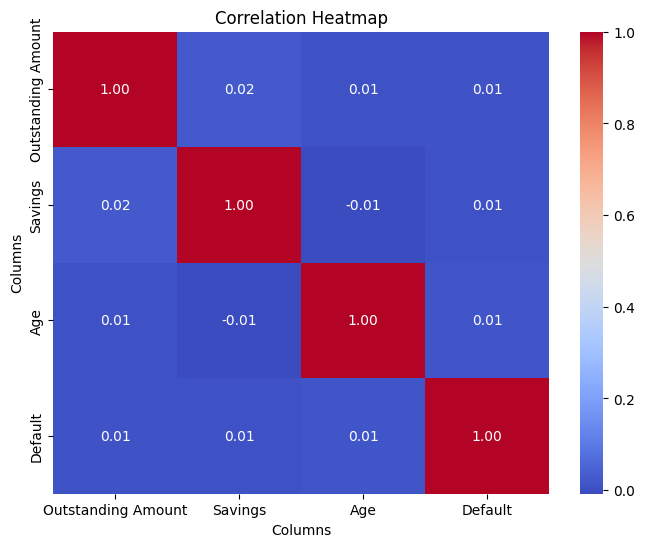

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Show the plot
plt.show()

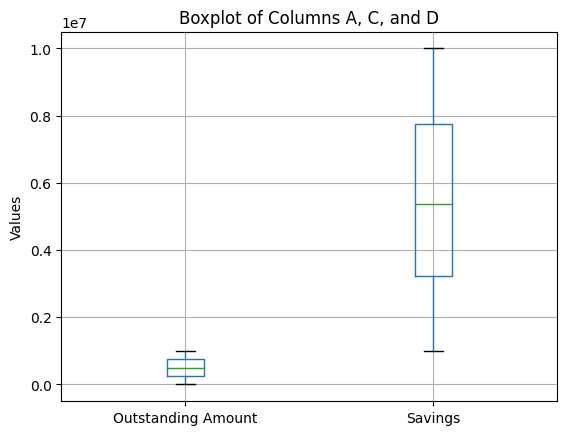

In [ ]:

df_copy[["Outstanding Amount","Savings"]].boxplot()

# Set title and labels
plt.title('Boxplot of Columns A, C, and D')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
df_1=df_copy[["Bank","Purchase Channel","City"]]
df_1

,Bank,Purchase Channel,City
0,ICICI,3,Delhi
1,SBI,1,Kolkata
2,SBI,1,Delhi
3,SBI,2,Mumbai
4,SBI,3,Mumbai
...,...,...,...
9995,HDFC,2,Delhi
9996,SBI,1,Kolkata
9997,SBI,3,Mumbai
9998,SBI,1,Mumbai


In [ ]:
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(df_1)
#Transform
df_1 = ohe.transform(df_1)
print(df_1.shape)
df_1.head()

(9998, 10)


,Bank_ICICI,Bank_SBI,Bank_HDFC,Purchase Channel_3,Purchase Channel_1,Purchase Channel_2,City_Delhi,City_Kolkata,City_Mumbai,City_Chennai
0,1,0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0


In [ ]:
columns_to_drop = ["Bank_ICICI","City_Delhi","Purchase Channel_3"]
df_1.drop(columns=columns_to_drop, inplace=True)
df_1.head()

,Bank_SBI,Bank_HDFC,Purchase Channel_1,Purchase Channel_2,City_Kolkata,City_Mumbai,City_Chennai
0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0
2,1,0,1,0,0,0,0
3,1,0,0,1,0,1,0
4,1,0,0,0,0,1,0


In [ ]:
df_final=pd.concat([df_1,df_copy], axis=1)
print(df_final.shape)
df_final.head()


(9998, 16)


,Bank_SBI,Bank_HDFC,Purchase Channel_1,Purchase Channel_2,City_Kolkata,City_Mumbai,City_Chennai,Outstanding Amount,Gender,Bank,Purchase Channel,Age,Savings,Card Type,City,Default
0,0,0,0,0,0,0,0,582993.0,1,ICICI,3,59.0,8469662,0,Delhi,1
1,1,0,1,0,1,0,0,760344.0,1,SBI,1,59.0,2732060,0,Kolkata,1
2,1,0,1,0,0,0,0,433971.0,0,SBI,1,35.0,5957477,1,Delhi,0
3,1,0,0,1,0,1,0,945476.0,0,SBI,2,38.0,2354419,0,Mumbai,1
4,1,0,0,0,0,1,0,874825.0,1,SBI,3,50.0,4013666,1,Mumbai,1


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bank_SBI            9998 non-null   int64  
 1   Bank_HDFC           9998 non-null   int64  
 2   Purchase Channel_1  9998 non-null   int64  
 3   Purchase Channel_2  9998 non-null   int64  
 4   City_Kolkata        9998 non-null   int64  
 5   City_Mumbai         9998 non-null   int64  
 6   City_Chennai        9998 non-null   int64  
 7   Outstanding Amount  9998 non-null   float64
 8   Gender              9998 non-null   int64  
 9   Bank                9998 non-null   object 
 10  Purchase Channel    9998 non-null   object 
 11  Age                 9998 non-null   float64
 12  Savings             9998 non-null   int64  
 13  Card Type           9998 non-null   int64  
 14  City                9998 non-null   object 
 15  Default             9998 non-null   int64  
dtypes: float64(

In [ ]:
columns_to_drop = ["Bank","City","Purchase Channel"]
df_final.drop(columns=columns_to_drop, inplace=True)
df_final.head()

,Bank_SBI,Bank_HDFC,Purchase Channel_1,Purchase Channel_2,City_Kolkata,City_Mumbai,City_Chennai,Outstanding Amount,Gender,Age,Savings,Card Type,Default
0,0,0,0,0,0,0,0,582993.0,1,59.0,8469662,0,1
1,1,0,1,0,1,0,0,760344.0,1,59.0,2732060,0,1
2,1,0,1,0,0,0,0,433971.0,0,35.0,5957477,1,0
3,1,0,0,1,0,1,0,945476.0,0,38.0,2354419,0,1
4,1,0,0,0,0,1,0,874825.0,1,50.0,4013666,1,1


In [ ]:
X=df_final.drop(columns=['Default'])
y=df_final["Default"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train.shape

(7998, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
# building the nural network model
import keras

from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu", input_dim=12))
classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))
classifier.compile(optimizer = "adam",loss = "binary_crossentropy", metrics=["accuracy"])
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5024
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.4966
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5044
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.6932 - accura

**MACHINE LEARNING**

In [ ]:
model_lr = LogisticRegression(max_iter=3000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
acc_train = accuracy_score(y_train,model_lr.predict(X_train))
acc_test = model_lr.score(X_test,y_test)

print("LR Training Accuracy:", acc_train)
print("LR Validation Accuracy:", acc_test)

LR Training Accuracy: 0.5153788447111778
LR Validation Accuracy: 0.502


In [ ]:
coefficients = model_lr.coef_

# Display coefficients
for feature, coef in zip(X.columns, coefficients[0]):
    print(f'{feature}: {coef}')

Bank_SBI: -0.01854084354391534
Bank_HDFC: -0.02201962817784655
Purchase Channel_1: 0.0031249099991345775
Purchase Channel_2: -0.014596174171710722
City_Kolkata: 0.004056437007233261
City_Mumbai: 0.022334184256010067
City_Chennai: 0.04321128919656671
Outstanding Amount: 0.020920481869029655
Gender: 0.0008598269827530299
Age: 0.030934573698039827
Savings: 0.009701234815434228
Card Type: -0.014694891562154012


In [ ]:
df.head()

,Outstanding Amount,Gender,Bank,Purchase Channel,Age,Savings,Card Type,City,Default
0,582993.0,1,ICICI,3,59.0,8469662,0,Delhi,1
1,760344.0,1,SBI,1,59.0,2732060,0,Kolkata,1
2,433971.0,0,SBI,1,35.0,5957477,1,Delhi,0
3,945476.0,0,SBI,2,38.0,2354419,0,Mumbai,1
4,874825.0,1,SBI,3,50.0,4013666,1,Mumbai,1


In [ ]:
df_new=df[["Outstanding Amount","Age","Savings","Default"]]
df_new.head()

,Outstanding Amount,Age,Savings,Default
0,582993.0,59.0,8469662,1
1,760344.0,59.0,2732060,1
2,433971.0,35.0,5957477,0
3,945476.0,38.0,2354419,1
4,874825.0,50.0,4013666,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outstanding Amount  9998 non-null   float64
 1   Age                 9998 non-null   float64
 2   Savings             9998 non-null   int64  
 3   Default             9998 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 648.6 KB


In [ ]:
X=df_new.drop(columns=['Default'])
y=df_new["Default"]
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
model_lr_2 = LogisticRegression(max_iter=3000)
model_lr_2.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
acc_train = accuracy_score(y_train,model_lr_2.predict(X_train))
acc_test = model_lr_2.score(X_test,y_test)

print("LR Training Accuracy:", acc_train)
print("LR Validation Accuracy:", acc_test)

LR Training Accuracy: 0.5077519379844961
LR Validation Accuracy: 0.4925
